In [1]:
import numpy as np
# fundamental library for scientific calculation.
import pandas as pd
# pandas are powerfull library that are used for data manipulation and analysis.
import matplotlib.pyplot as plt
# library used for data visualization.
import seaborn as sns
# library used for powerfull data visualization,its built on top of matplotlib.
from sklearn.model_selection import train_test_split
# its used for best selecting  the best model.
# where train_test_split is used input a training value where its  used for predicting the model value
from sklearn.preprocessing import LabelEncoder,StandardScaler
# labels are used to normalize labels(Convert Categorical Variables into numerical form).
# StandardScaler Removes mean and Scales the Data
from sklearn.feature_extraction.text import CountVectorizer
# used in NLP where it is used to convert text values into numerical one
from sklearn import metrics
from xgboost import XGBRegressor


In [2]:
df=pd.read_csv(r'boxoffice.csv')
#Reading the csv file using pandas
df

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,The Avengers,6026491,1274885664,Warner Bros.,163620146,253,174687337,R,Animation,16
1,Titanic,169411543,1132871091,Disney,85549990,122,103948486,G,Action,103
2,Jurassic Park,107836098,583329845,Sony,55681429,3826,122104991,NC-17,Horror,89
3,Avatar,51433697,1225323391,Disney,109775324,3868,46431596,G,Horror,85
4,The Lion King,142791649,604140729,Warner Bros.,59476800,2934,203513696,R,Comedy,158
...,...,...,...,...,...,...,...,...,...,...
2689,X-Men,38153242,47601900,Disney,140965221,3532,106955513,G,Comedy,92
2690,The Matrix,63305093,252473529,Disney,190634982,3171,111238142,PG-13,Comedy,156
2691,Forrest Gump,271758510,524896297,Disney,112771730,2450,112364620,NC-17,Drama,146
2692,Jaws,268259149,791515453,Disney,194172443,661,172229703,G,Thriller,170


In [3]:
df.shape
# Displayes the number of rows column i.e 2694 rows and 10 columns

(2694, 10)

In [4]:
df.info()
# Each columns datatype and null count and memory usage are known

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   int64 
 2   world_revenue     2694 non-null   int64 
 3   distributor       2694 non-null   object
 4   opening_revenue   2694 non-null   int64 
 5   opening_theaters  2694 non-null   int64 
 6   budget            2694 non-null   int64 
 7   MPAA              2694 non-null   object
 8   genres            2694 non-null   object
 9   release_days      2694 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 210.6+ KB


In [5]:
df.describe().T
# All the statistical value of each columns are obtained,(T stands for Transpose)

,count,mean,std,min,25%,50%,75%,max
domestic_revenue,2694.0,1.508539e+08,8.579997e+07,827765.0,7.673272e+07,152572473.5,2.247314e+08,2.998107e+08
world_revenue,2694.0,7.719177e+08,4.284414e+08,3261301.0,3.991135e+08,766555142.5,1.143920e+09,1.499310e+09
opening_revenue,2694.0,9.971321e+07,5.721762e+07,138569.0,5.033848e+07,99814175.0,1.489805e+08,1.999336e+08
opening_theaters,2694.0,2.263039e+03,1.298559e+03,10.0,1.161000e+03,2271.5,3.392250e+03,4.499000e+03
budget,2694.0,1.537996e+08,8.557624e+07,5197977.0,7.861876e+07,156256716.0,2.274832e+08,2.998597e+08
release_days,2694.0,9.089755e+01,5.089404e+01,1.0,4.700000e+01,91.0,1.350000e+02,1.790000e+02


In [6]:
to_remove=['world_revenue','opening_revenue']
df.drop(to_remove,axis=1,inplace=True)
# Column World_revenue and opening_revenue are  removed
# drop is used to drop specified column
# inplace is used to set the non deleted columns inplace


In [7]:
df.isnull().sum()*100/df.shape[0]
# is null is used to identify the null values.
# sum is used to add the total number of null values and print the sum of total null values.
# above code is used to find the percentage ofnull values.

title               0.0
domestic_revenue    0.0
distributor         0.0
opening_theaters    0.0
budget              0.0
MPAA                0.0
genres              0.0
release_days        0.0
dtype: float64

In [8]:
df.drop('budget',axis=1,inplace=True)
# dropping the budget column

In [9]:
df['MPAA'].unique()
# for understanding the different values in the column

array(['R', 'G', 'NC-17', 'PG-13', 'PG'], dtype=object)

In [10]:
df['genres'].unique()
# for understandinf the different values in the column

array(['Animation', 'Action', 'Horror', 'Comedy', 'Drama', 'Thriller'],
      dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   int64 
 2   distributor       2694 non-null   object
 3   opening_theaters  2694 non-null   int64 
 4   MPAA              2694 non-null   object
 5   genres            2694 non-null   object
 6   release_days      2694 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 147.5+ KB


In [12]:
for col in['domestic_revenue','opening_theaters','release_days']:
    df[col]=df[col].astype(float)
# using for loop to convert the columns into float type

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             2694 non-null   object 
 1   domestic_revenue  2694 non-null   float64
 2   distributor       2694 non-null   object 
 3   opening_theaters  2694 non-null   float64
 4   MPAA              2694 non-null   object 
 5   genres            2694 non-null   object 
 6   release_days      2694 non-null   float64
dtypes: float64(3), object(4)
memory usage: 147.5+ KB


EDA PROCESS

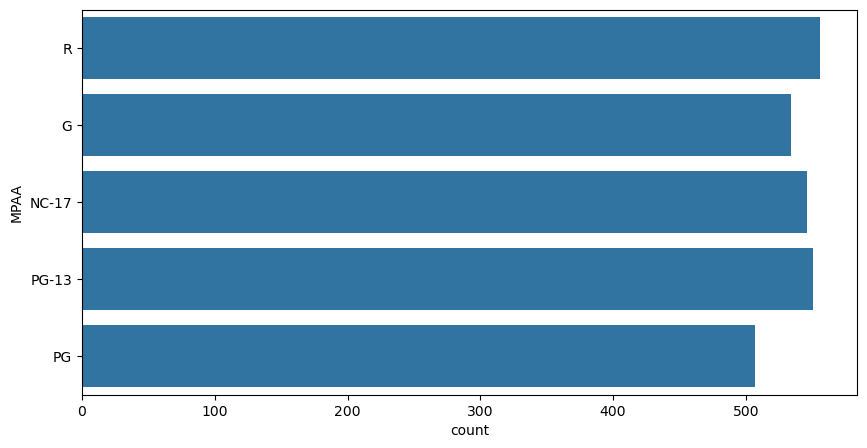

In [15]:
plt.figure(figsize=(10,5))
# Graph size being initiated
sns.countplot(df['MPAA'])
# countplot is plotted using seaborn library for the column MPAA
plt.show()
# plt show is used to show the chart while keeping the excess info out.

In [16]:
df.groupby('MPAA')['domestic_revenue'].mean()
# grouping the unique values of mpa values with the domestic_revenues and finding their mean values.

MPAA
G        1.465288e+08
NC-17    1.507193e+08
PG       1.529123e+08
PG-13    1.477556e+08
R        1.563334e+08
Name: domestic_revenue, dtype: float64

C:\Users\binuk\AppData\Local\Temp\ipykernel_21400\982749731.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\binuk\AppData\Local\Temp\ipykernel_21400\982749731.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\binuk\AppData\Local\Temp\ipykernel_21400\98

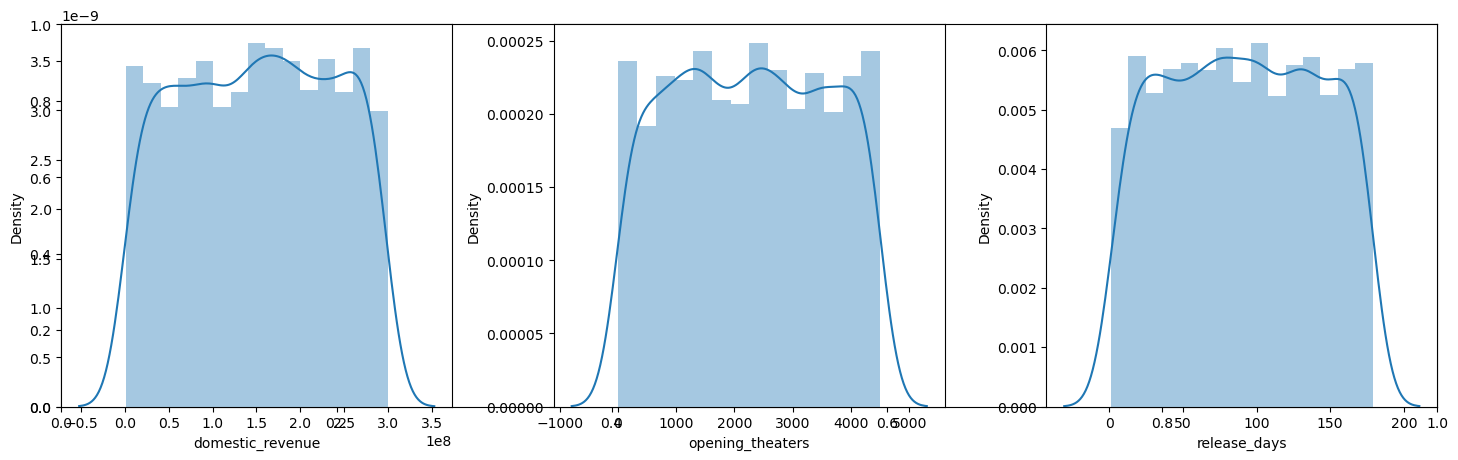

In [17]:
plt.subplots(figsize=(15,5))
# subplot is used to plot the xaxis and y axis respectively
features=['domestic_revenue','opening_theaters','release_days']
# all the 3 columns are initiated to a variable
for i,col in enumerate(features):
# enumerate provides index i and column list in (col)
    plt.subplot(1,3,i+1)
    # cretes grid of subplot with 1 row and 3 columns
    # i+1 is used to intiate plot 
    # i=0,plots graph1
    # i=1,plots graph2
    # i=2,plots grah3
    sns.distplot(df[col])
    # distplot is plotted with for all the columns
plt.tight_layout()
# tight_layout is used to create a proper space between the distplots
plt.show()

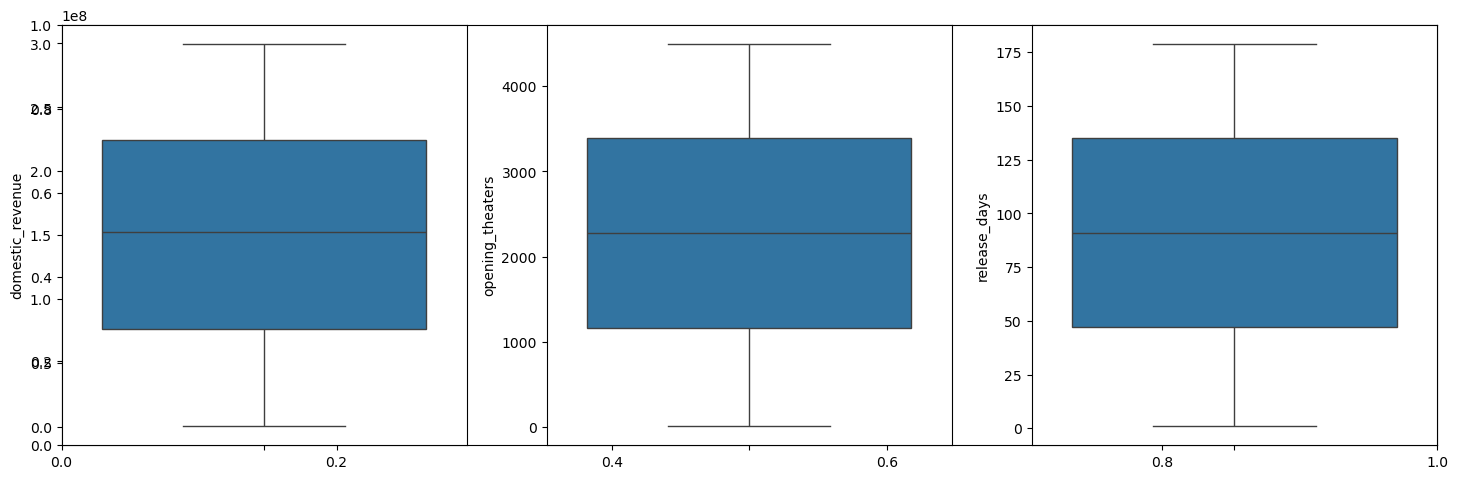

In [18]:
plt.subplots(figsize=(15,5))
for i,col in enumerate(features):
    plt.subplot(1,3,i+1)
    sns.boxplot(df[col])
    # plotting a box plot of columns to check the outliers
plt.tight_layout()
plt.show()

In [19]:
for col in features:
  df[col] = df[col].apply(lambda x: np.log10(x))
# orginal vales get replaced with log base 10 values

C:\Users\binuk\AppData\Local\Temp\ipykernel_21400\4062034050.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\binuk\AppData\Local\Temp\ipykernel_21400\4062034050.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\binuk\AppData\Local\Temp\ipykernel_21400\40

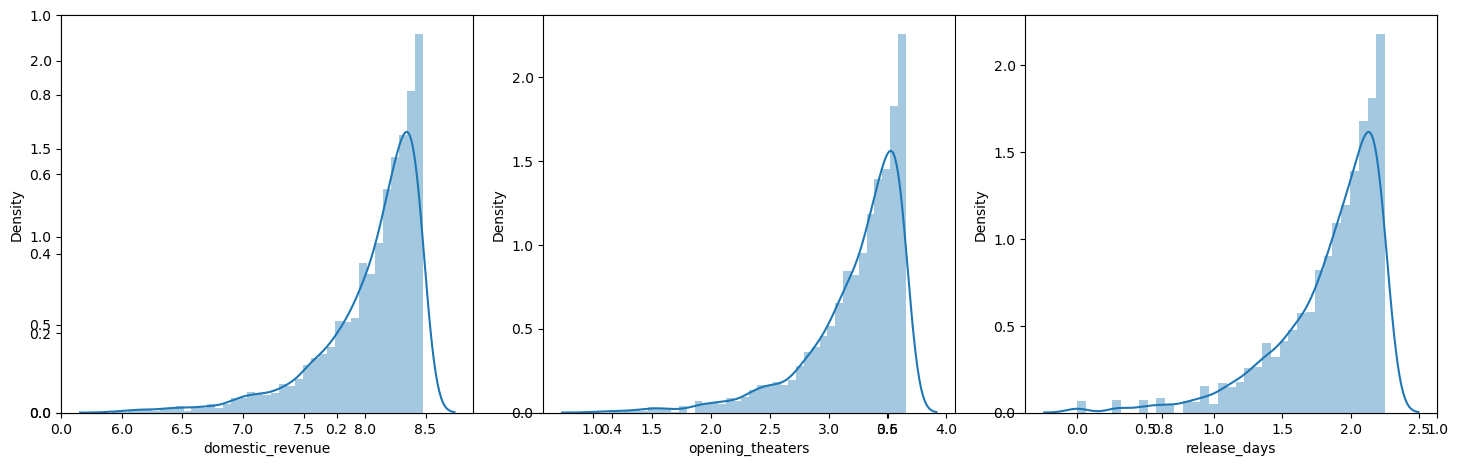

In [20]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.distplot(df[col])
    # distplot based on log base
plt.tight_layout()
plt.show()

In [77]:
print(df)

              title  domestic_revenue   distributor  opening_theaters   MPAA  \
0      The Avengers          6.780065  Warner Bros.          2.403121      R   
1           Titanic          8.228943        Disney          2.086360      G   
2     Jurassic Park          8.032764          Sony          3.582745  NC-17   
3            Avatar          7.711248        Disney          3.587486      G   
4     The Lion King          8.154703  Warner Bros.          3.467460      R   
...             ...               ...           ...               ...    ...   
2689          X-Men          7.581531        Disney          3.548021      G   
2690     The Matrix          7.801439        Disney          3.501196  PG-13   
2691   Forrest Gump          8.434183        Disney          3.389166  NC-17   
2692           Jaws          8.428555        Disney          2.820201      G   
2693   Interstellar          8.199582     Universal          3.592621  PG-13   

         genres  release_days  
0     A

In [21]:
x=df.iloc[:,:-1]
# Release days removed
# using iloc function to remove the last column and assigning the rest column into new variable
print(x)

              title  domestic_revenue   distributor  opening_theaters   MPAA  \
0      The Avengers          6.780065  Warner Bros.          2.403121      R   
1           Titanic          8.228943        Disney          2.086360      G   
2     Jurassic Park          8.032764          Sony          3.582745  NC-17   
3            Avatar          7.711248        Disney          3.587486      G   
4     The Lion King          8.154703  Warner Bros.          3.467460      R   
...             ...               ...           ...               ...    ...   
2689          X-Men          7.581531        Disney          3.548021      G   
2690     The Matrix          7.801439        Disney          3.501196  PG-13   
2691   Forrest Gump          8.434183        Disney          3.389166  NC-17   
2692           Jaws          8.428555        Disney          2.820201      G   
2693   Interstellar          8.199582     Universal          3.592621  PG-13   

         genres  
0     Animation  
1  

In [75]:
y=df.iloc[:,4]
# genres getting assigned to y
#row 4 is getting selected and assigned to y

In [23]:
genres=pd.get_dummies(x['genres'],drop_first=False)
# getting the dummy values for genres column
genres

,Action,Animation,Comedy,Drama,Horror,Thriller
0,False,True,False,False,False,False
1,True,False,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,True,False,False,False
...,...,...,...,...,...,...
2689,False,False,True,False,False,False
2690,False,False,True,False,False,False
2691,False,False,False,True,False,False
2692,False,False,False,False,False,True


In [24]:
x=x.drop('genres',axis=1)
# dropping the genres from x 
x

,title,domestic_revenue,distributor,opening_theaters,MPAA
0,The Avengers,6.780065,Warner Bros.,2.403121,R
1,Titanic,8.228943,Disney,2.086360,G
2,Jurassic Park,8.032764,Sony,3.582745,NC-17
3,Avatar,7.711248,Disney,3.587486,G
4,The Lion King,8.154703,Warner Bros.,3.467460,R
...,...,...,...,...,...
2689,X-Men,7.581531,Disney,3.548021,G
2690,The Matrix,7.801439,Disney,3.501196,PG-13
2691,Forrest Gump,8.434183,Disney,3.389166,NC-17
2692,Jaws,8.428555,Disney,2.820201,G


In [25]:
x=pd.concat([x,genres],axis=1)
# concating the one genres(dummy varible)
print(x)

              title  domestic_revenue   distributor  opening_theaters   MPAA  \
0      The Avengers          6.780065  Warner Bros.          2.403121      R   
1           Titanic          8.228943        Disney          2.086360      G   
2     Jurassic Park          8.032764          Sony          3.582745  NC-17   
3            Avatar          7.711248        Disney          3.587486      G   
4     The Lion King          8.154703  Warner Bros.          3.467460      R   
...             ...               ...           ...               ...    ...   
2689          X-Men          7.581531        Disney          3.548021      G   
2690     The Matrix          7.801439        Disney          3.501196  PG-13   
2691   Forrest Gump          8.434183        Disney          3.389166  NC-17   
2692           Jaws          8.428555        Disney          2.820201      G   
2693   Interstellar          8.199582     Universal          3.592621  PG-13   

      Action  Animation  Comedy  Drama 

In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             2694 non-null   object 
 1   domestic_revenue  2694 non-null   float64
 2   distributor       2694 non-null   object 
 3   opening_theaters  2694 non-null   float64
 4   MPAA              2694 non-null   object 
 5   Action            2694 non-null   bool   
 6   Animation         2694 non-null   bool   
 7   Comedy            2694 non-null   bool   
 8   Drama             2694 non-null   bool   
 9   Horror            2694 non-null   bool   
 10  Thriller          2694 non-null   bool   
dtypes: bool(6), float64(2), object(3)
memory usage: 121.1+ KB


In [32]:
for col in ['distributor', 'MPAA']:
    le = LabelEncoder()
    x[col] = le.fit_transform(df[col])

In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             2694 non-null   object 
 1   domestic_revenue  2694 non-null   float64
 2   distributor       2694 non-null   int32  
 3   opening_theaters  2694 non-null   float64
 4   MPAA              2694 non-null   int32  
 5   Action            2694 non-null   bool   
 6   Animation         2694 non-null   bool   
 7   Comedy            2694 non-null   bool   
 8   Drama             2694 non-null   bool   
 9   Horror            2694 non-null   bool   
 10  Thriller          2694 non-null   bool   
dtypes: bool(6), float64(2), int32(2), object(1)
memory usage: 100.1+ KB


<Axes: >

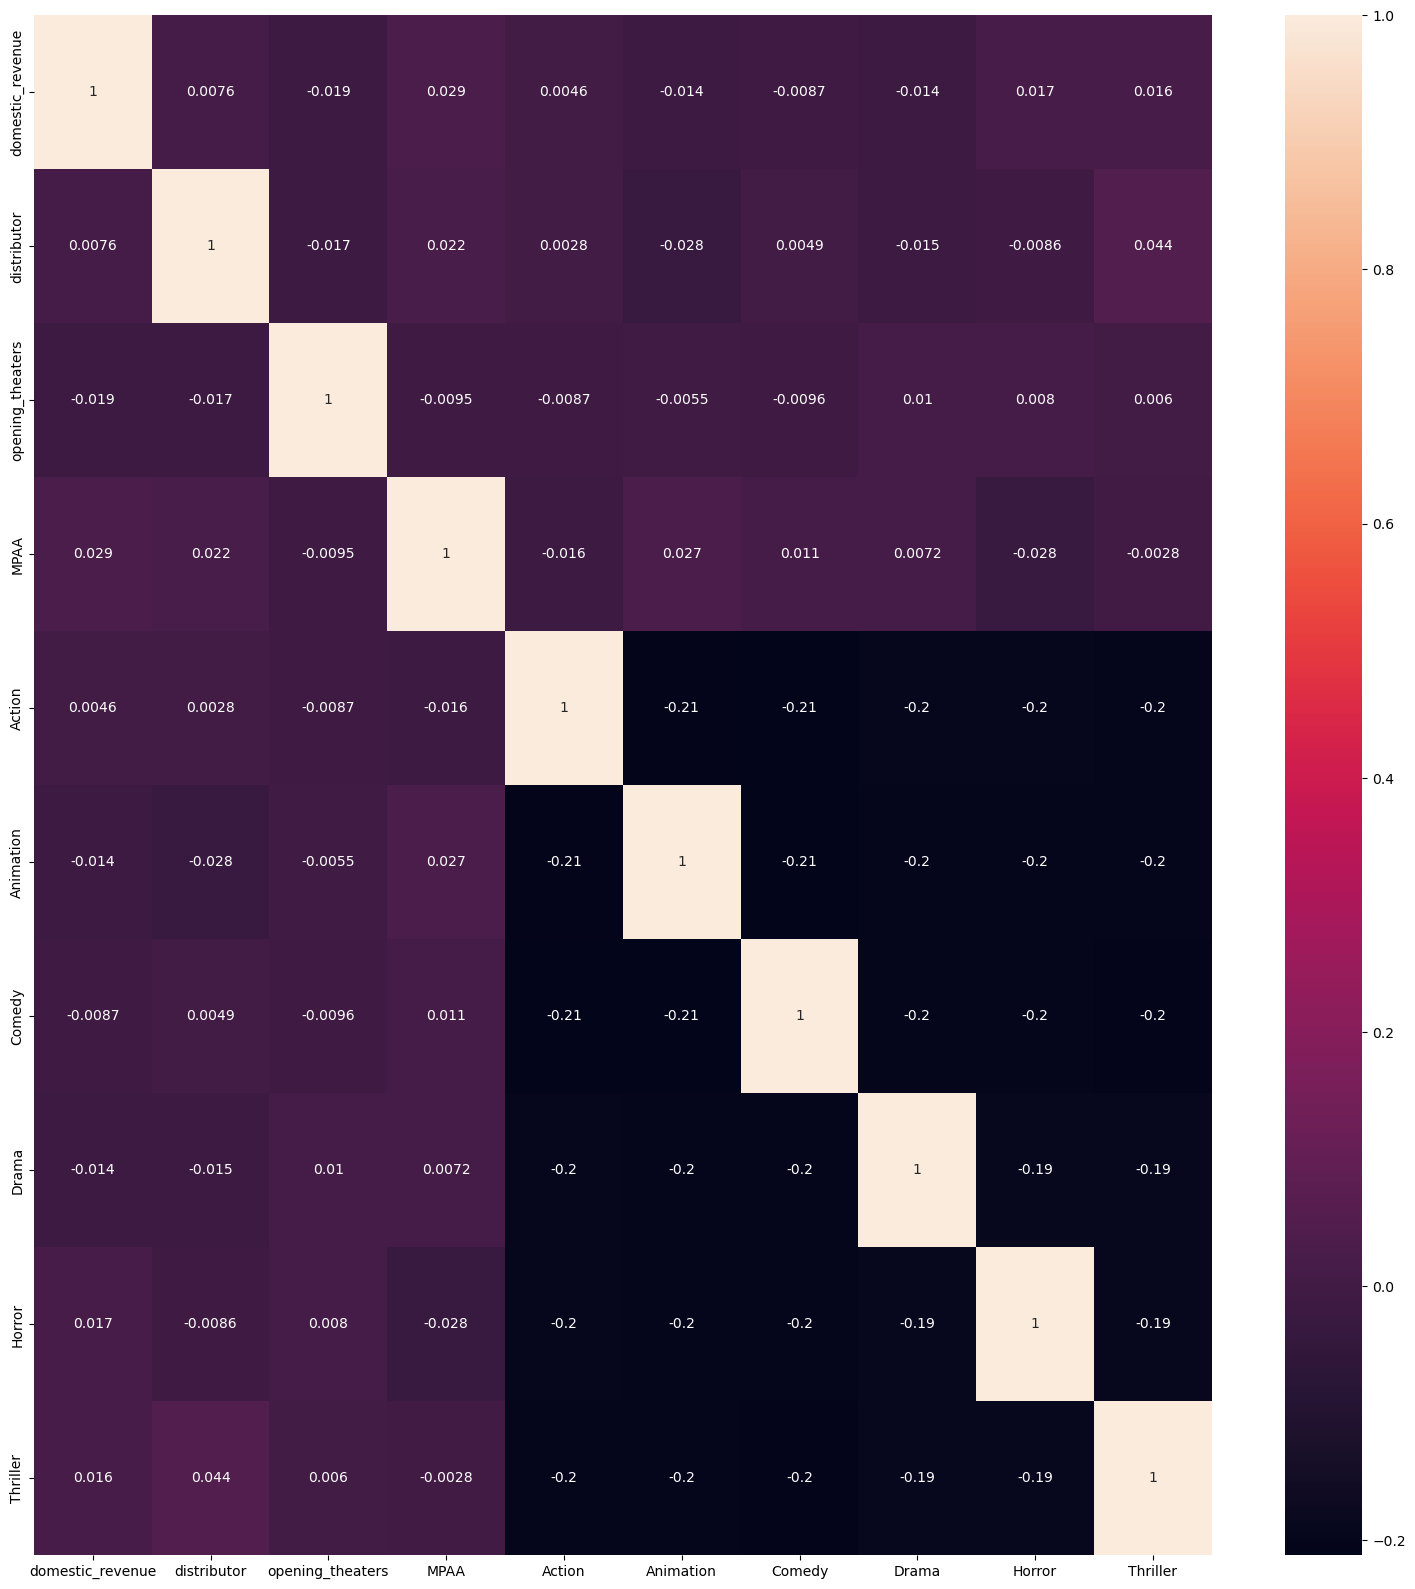

In [40]:
plt.figure(figsize=(19,20))
sns.heatmap(x.corr(numeric_only=True),annot=True)

In [42]:
print(x)

              title  domestic_revenue  distributor  opening_theaters  MPAA  \
0      The Avengers          6.780065            4          2.403121     4   
1           Titanic          8.228943            0          2.086360     0   
2     Jurassic Park          8.032764            2          3.582745     1   
3            Avatar          7.711248            0          3.587486     0   
4     The Lion King          8.154703            4          3.467460     4   
...             ...               ...          ...               ...   ...   
2689          X-Men          7.581531            0          3.548021     0   
2690     The Matrix          7.801439            0          3.501196     3   
2691   Forrest Gump          8.434183            0          3.389166     1   
2692           Jaws          8.428555            0          2.820201     0   
2693   Interstellar          8.199582            3          3.592621     3   

      Action  Animation  Comedy  Drama  Horror  Thriller  
0   

In [46]:
x=x.drop('title',axis=1)
print(x)

      domestic_revenue  distributor  opening_theaters  MPAA  Action  \
0             6.780065            4          2.403121     4   False   
1             8.228943            0          2.086360     0    True   
2             8.032764            2          3.582745     1   False   
3             7.711248            0          3.587486     0   False   
4             8.154703            4          3.467460     4   False   
...                ...          ...               ...   ...     ...   
2689          7.581531            0          3.548021     0   False   
2690          7.801439            0          3.501196     3   False   
2691          8.434183            0          3.389166     1   False   
2692          8.428555            0          2.820201     0   False   
2693          8.199582            3          3.592621     3   False   

      Animation  Comedy  Drama  Horror  Thriller  
0          True   False  False   False     False  
1         False   False  False   False     Fa

In [54]:
y=x['domestic_revenue']
print(y)


0       6.780065
1       8.228943
2       8.032764
3       7.711248
4       8.154703
          ...   
2689    7.581531
2690    7.801439
2691    8.434183
2692    8.428555
2693    8.199582
Name: domestic_revenue, Length: 2694, dtype: float64


In [56]:
x=x.drop('domestic_revenue',axis=1)
print(x)

      distributor  opening_theaters  MPAA  Action  Animation  Comedy  Drama  \
0               4          2.403121     4   False       True   False  False   
1               0          2.086360     0    True      False   False  False   
2               2          3.582745     1   False      False   False  False   
3               0          3.587486     0   False      False   False  False   
4               4          3.467460     4   False      False    True  False   
...           ...               ...   ...     ...        ...     ...    ...   
2689            0          3.548021     0   False      False    True  False   
2690            0          3.501196     3   False      False    True  False   
2691            0          3.389166     1   False      False   False   True   
2692            0          2.820201     0   False      False   False  False   
2693            3          3.592621     3   False      False    True  False   

      Horror  Thriller  
0      False     False  
1

In [63]:
X_train,X_val,Y_train,Y_val=train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape,X_val.shape,Y_train.shape,Y_val.shape

((2155, 9), (539, 9), (2155,), (539,))

In [67]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)

In [69]:
from sklearn.metrics import mean_absolute_error as mae
model = XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [71]:
train_preds = model.predict(X_train) 
print('Training Error : ', mae(Y_train, train_preds)) 

val_preds = model.predict(X_val) 
print('Validation Error : ', mae(Y_val, val_preds)) 
print() 

Training Error :  0.14270615065546222
Validation Error :  0.36375005179708847

